In [33]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from constants import *
import psana


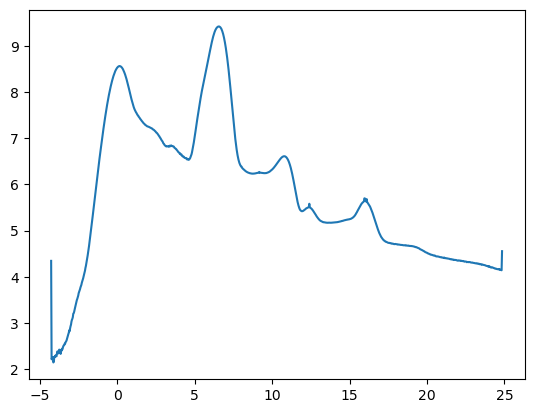

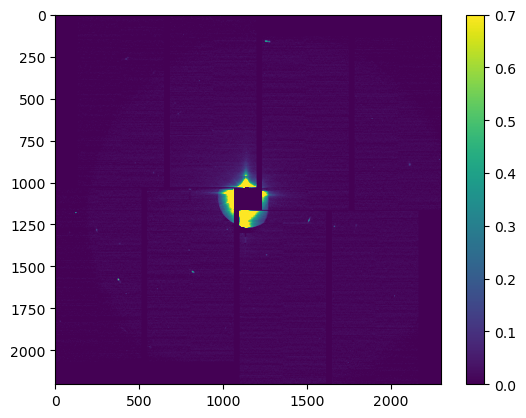

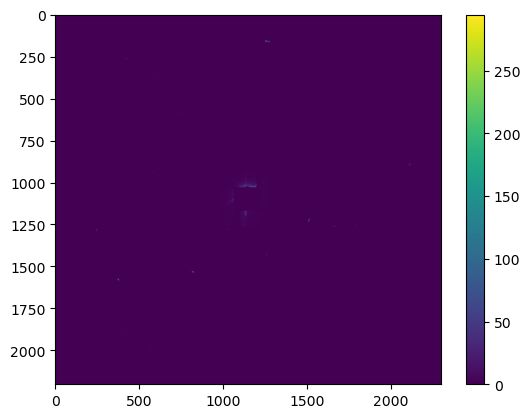

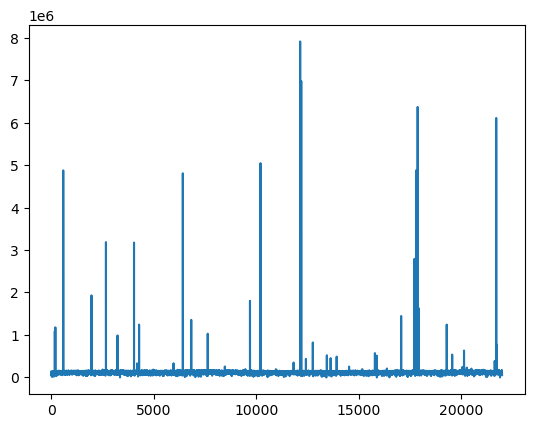

In [50]:

run = 31
ds = psana.DataSource(f'exp={EXP_NAME}:run={run}:smd')

env = ds.env() #not sure what this is or why we load it

det_name = 'CxiDs1.0:Jungfrau.0' ## or alias 'jungfrau4M'

det = psana.Detector(det_name, env)


with h5py.File(f'{H5_FOLDER}/r{run}.h5') as f:
    
    run_mean = f['/run_mean'][:]
    run_sigma = f['/run_sigma'][:]
    event_inten = f['/event_inten'][:]
    pixel_hist = f['/pixel_hist_le25'][:]
    pixel_hist_bins_le50 = f['/pixel_hist_bins_le25'][:-1]
  

for evt in ds.events():
    break
    
assem_run_mean = det.image(evt, run_mean)
assem_run_sigma = det.image(evt, run_sigma)

plt.figure()
plt.plot(pixel_hist_bins_le50,np.log10(pixel_hist))

plt.figure()
plt.imshow(assem_run_mean, vmin=0, vmax=0.7)
plt.colorbar()

plt.figure()
plt.imshow(assem_run_sigma)
plt.colorbar()



plt.figure()
plt.plot(event_inten)